In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.linear_model import LinearRegression

In [ ]:
#TV: هزینه تبلیغات به دلار برای تبلیغات در تلویزیون هزینه می شود
#Radio: هزینه تبلیغات به دلار برای تبلیغات در رادیو هزینه می شود
#Newspaper: هزینه تبلیغات به دلار برای تبلیغات در روزنامه صرف می شود
#Sales: تعداد واحدهای فروخته شده

In [2]:
data = pd.read_csv('../dataset/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


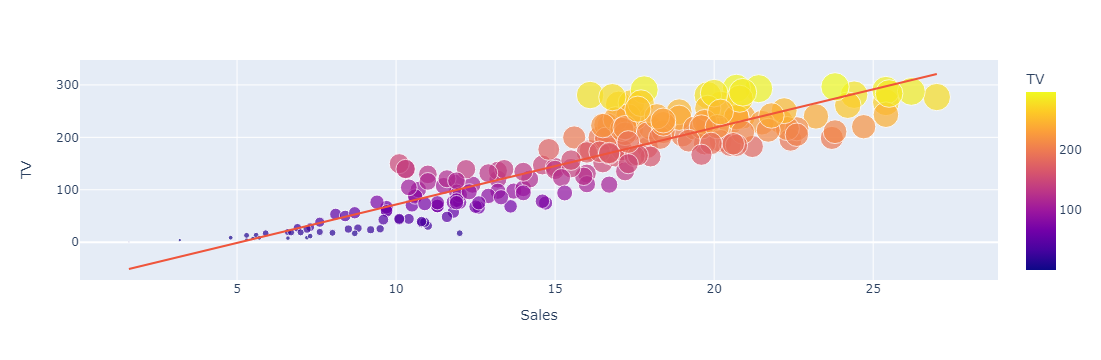

In [4]:
# رابطه ی بین فروش با تبلیغات تلویزیونی را بررسی می کنیم
figure = px.scatter(data_frame = data, x = "Sales", y = "TV", color = "TV", size = "TV", trendline = "ols")
figure.show()

# نتیجه
# هرچقدر تبلیغات تلویزیونی بیشتر بوده، در نتیجه میزان فروش نیز بالاتر بوده است

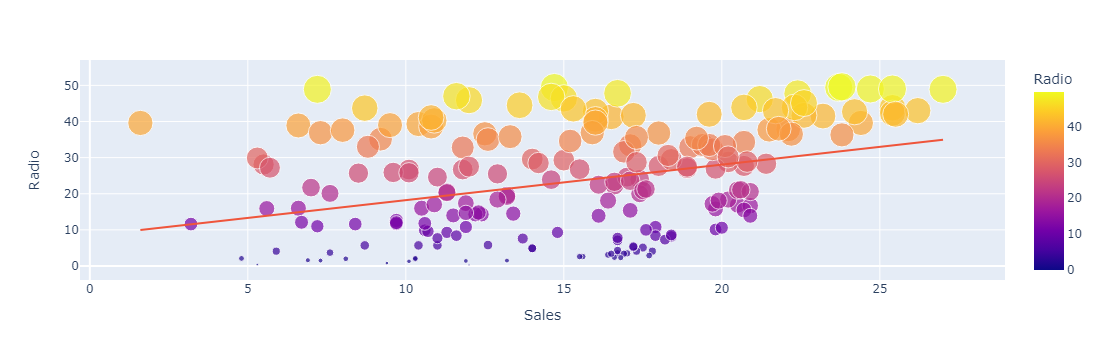

In [5]:
figure = px.scatter(data_frame = data, x = "Sales", y = "Radio", color = "Radio", size = "Radio", trendline = "ols")
figure.show()

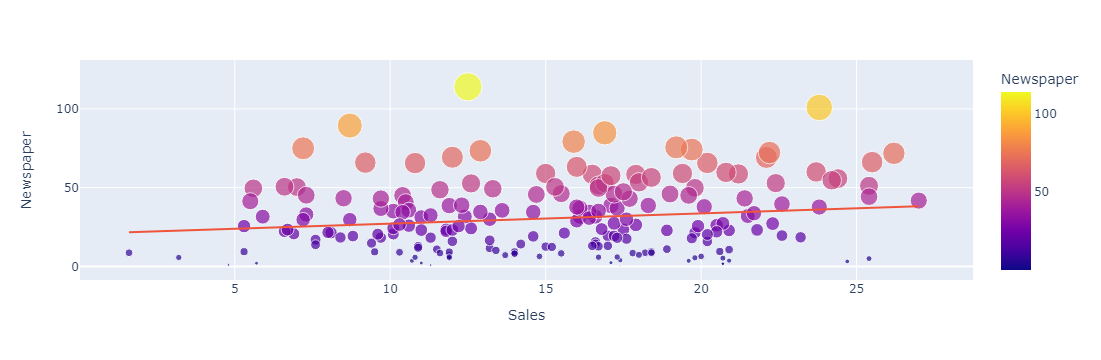

In [8]:
figure = px.scatter(data_frame = data, x = "Sales", y = "Newspaper", color = "Newspaper", size = "Newspaper", trendline='ols')
figure.show()

In [12]:
# ابتدا همبستگی بین داده ها را بدست می آوریم و در متغییر ذخیره می کنیم سپس براساس ستون فروش مربوطه مقدار همبستگی را sort می کنیم
data_corr = data.corr()
print(data_corr['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [ ]:
# نتیجه می گیریم که هرچقدر تبلیغات تلویزیونی بیشتر باشد در نتیجه فروش بیشتری خواهیم داشت

In [13]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
isf = IsolationForest(contamination = 0.05, random_state = 42)
data['Outlier'] = isf.fit_predict(data)
data.head()

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



,TV,Radio,Newspaper,Sales,Outlier
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,12.0,1
3,151.5,41.3,58.5,16.5,1
4,180.8,10.8,58.4,17.9,1


In [19]:
data['Outlier'].value_counts()

Outlier
 1    190
-1     10
Name: count, dtype: int64

In [20]:
(10/190)*100

5.263157894736842

In [21]:
data_no_outlier = data[data['Outlier'] != -1]
data_no_outlier

,TV,Radio,Newspaper,Sales,Outlier
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,12.0,1
3,151.5,41.3,58.5,16.5,1
4,180.8,10.8,58.4,17.9,1
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1
196,94.2,4.9,8.1,14.0,1
197,177.0,9.3,6.4,14.8,1
198,283.6,42.0,66.2,25.5,1


In [22]:
X_preprocess = data_no_outlier.drop('Outlier', axis = 1)
X_preprocess.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
X = X_preprocess.drop('Sales', axis = 1)
y = X_preprocess['Sales']

In [24]:
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape X: (190, 3)
Shape y: (190,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = xg.XGBRegressor(booster = "gblinear", n_estimators = 10, seed = 123)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
print(model.score(X_test, y_test))

0.5238959894394115


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8818482796718053


In [39]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.1907803]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

